Project requirements (25%): <br>
Groups of 1-3 students will be formed to work on a term-long group project related to software security technologies. <br>
Which Software Security Technologies? Students are asked to use open source data, e.g. <br>
https://data.phishtank.com/ <br> 
https://stackoverflow.com/<br> 
https://www.kaggle.com/datasetsLinks<br> 
and then perform advanced analysis such as AI/ML in Python.

Jupyter Notebook must be used.<br>
The project will be evaluated based on the problem’s importance, solution novelty, technical quality, degree of complexity/efforts creativity, presentation quality, and documentation quality.
The project has two main deliverables: a presentation and a report.
Presentations (10% of the course grade)
All projects will be demonstrated and presented in class.
About 8-10 minutes will be allocated for the demonstration/presentation of each final project. You can present early in the semester or wait for the final weeks (see the course schedule below). Early presenters will be given a break in the score.
Each group member is expected to participate in every phase of the project.
The final grade of each member will be proportional to his/her participation in the group, as assessed by the instructor and the student’s peers.
Each member should be able to answer questions regarding the project, present some part of the project demo, and actively participate in the system implementation and the writing of the technical report.

### Introduction & Objective

Published in 2009, the NSL-KDD dataset was created to help benchmark and test different intrusion detection systems. This dataset is an improved rendition based on the earlier version of the dataset (KDD 99), where improvements would include containing no redundant records in the training dataset, no duplicate records in the testing dataset, a reasonable amount of records within each dataset, and a more balanced selection of records between the different difficulty levels [1]. This ensures that there would be reduced bias over frequent records, improved performance, and higher evaluation accuracy.

To gain a better understanding of the NSL-KDD dataset, the training data and test data will be further analyzed. The first part will include preprocessing and feature encoding. This will also include selecting the top 10 features using the sklearn library's feature selection. After the data is updated, three different classification models will be used. This will include Random Forest, Neural Network, and Logistic Regression. The accuracy, precision, recall, and F-1 score will be calculated to verify the performance for each model. In addition to comparing all the models, the impact of selecting specific features would also be investigated. This will include tabularizing the data and calculating the computational time for each model. Although this will be heavily focused on analysis, this will serve as a good introductory to the importance of datasets for intrusion detection systems and the performance of different models.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import time

from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [2]:
#pip install "numpy>=1.16.5,<1.23.0"

###  Data Exploration and Preprocessing

In [3]:
df = pd.read_csv("nsl-kdd/KDDTrain+.txt")
#test_data = pd.read_csv("nsl-kdd/KDDTest+.txt")

In [4]:
# Column label for the training and testing datasets
label = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = label
#test_data_df.columns = label

In [5]:
# Display the first few rows of the dataset
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [7]:
# Count unique values
for col in df:
    print(col, "=>", len(df[col].unique()))

duration => 2981
protocol_type => 3
service => 70
flag => 11
src_bytes => 3341
dst_bytes => 9326
land => 2
wrong_fragment => 3
urgent => 4
hot => 28
num_failed_logins => 6
logged_in => 2
num_compromised => 88
root_shell => 2
su_attempted => 3
num_root => 82
num_file_creations => 35
num_shells => 3
num_access_files => 10
num_outbound_cmds => 1
is_host_login => 2
is_guest_login => 2
count => 512
srv_count => 509
serror_rate => 89
srv_serror_rate => 86
rerror_rate => 82
srv_rerror_rate => 62
same_srv_rate => 101
diff_srv_rate => 95
srv_diff_host_rate => 60
dst_host_count => 256
dst_host_srv_count => 256
dst_host_same_srv_rate => 101
dst_host_diff_srv_rate => 101
dst_host_same_src_port_rate => 101
dst_host_srv_diff_host_rate => 75
dst_host_serror_rate => 101
dst_host_srv_serror_rate => 100
dst_host_rerror_rate => 101
dst_host_srv_rerror_rate => 101
attack => 23
level => 22


In [8]:
# Statistical summary of the dataset
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### Labeling and analyzing the different attack types

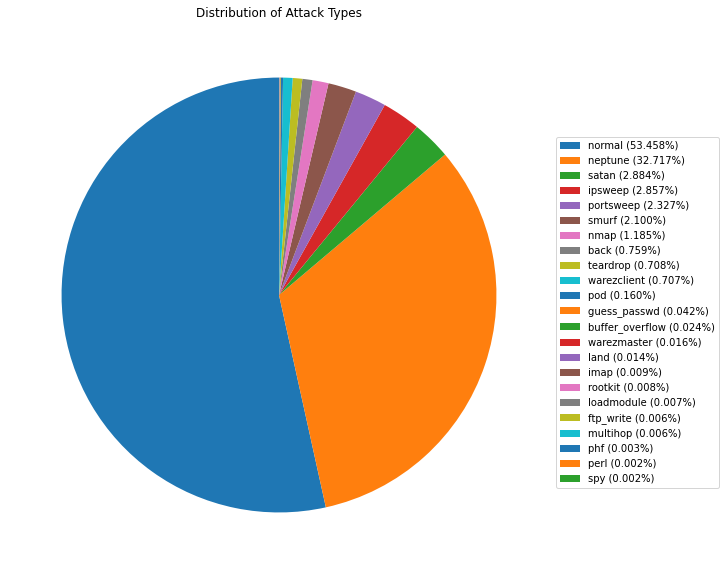

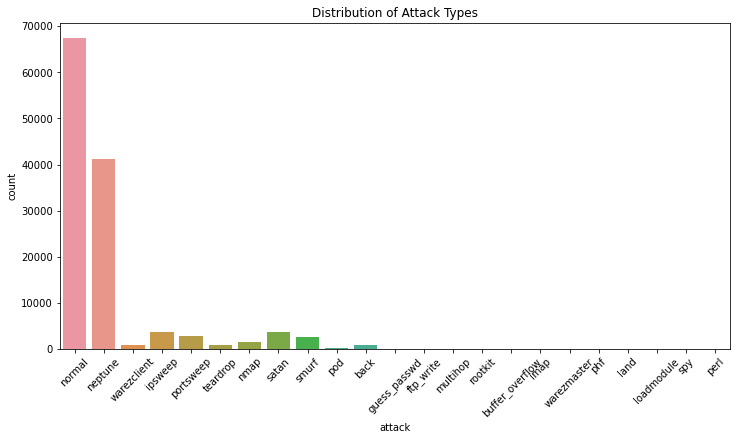

In [9]:
# Append a new column 'is_attack' based on the 'attack' column
df['is_attack'] = df['attack'].apply(lambda x: 1 if x != 'normal' else 0)
#test_data['is_attack'] = test_data['attack'].apply(lambda x: 1 if x != 'normal' else 0)

# Count the occurrences of each attack type
attack_training_count = df['attack'].value_counts()

# Attack table for training data
plt.figure(figsize=(10, 10))
pieTable = plt.pie(attack_training_count, labels=None, startangle=90)
plt.title('Distribution of Attack Types')
# Legend to contain the attack type and percentage
labels = [f'{label} ({percent:.3f}%)' for label, percent in zip(attack_training_count.index, attack_training_count.values / sum(attack_training_count) * 100)]
plt.legend(pieTable[0], labels, bbox_to_anchor=(1.0,0.8))
plt.show()

# Distribution of attacks
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='attack')
plt.xticks(rotation=45)
plt.title('Distribution of Attack Types')
plt.show()

## Feature Encoding

#### Check which features need to be dropped

In [10]:
counts = {}
for column in df:
    if len(df[column].unique()) < 2:
           print(column)

print("Any empty values:", df.isnull().values.any())

num_outbound_cmds
Any empty values: False


#### Cleaning up

In [11]:
#Drop it because it's an empty column
df = df.drop("num_outbound_cmds", axis=1)

#Separating out before encoding for simpicity
y = df["is_attack"]
y_precise = df["attack"]
df = df.drop(["is_attack", "attack"], axis=1)

cat_columns = df.select_dtypes(include=["object"]).columns.tolist()
print(cat_columns)

['protocol_type', 'service', 'flag']


#### Train/Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 68, test_size=0.2, shuffle=True)

#This took forever to figure out, the indexes went missing when we did the encoding
X_train = X_train.sort_index(ascending=True).reset_index(drop=True)
y_train = y_train.sort_index(ascending=True).reset_index(drop=True)

X_test = X_test.sort_index(ascending=True).reset_index(drop=True)
y_test = y_test.sort_index(ascending=True).reset_index(drop=True)

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19
1,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21
2,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21
3,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,21
4,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,21


#### One Hot Encoding

In [13]:
ohe = OneHotEncoder(sparse_output=False)

encoded_cat_columns = ohe.fit_transform(X_train[cat_columns])
df_encoded_cat_columns = pd.DataFrame(encoded_cat_columns, columns=ohe.get_feature_names_out(cat_columns))
X_ohe_train = pd.concat([X_train, df_encoded_cat_columns], axis=1)
X_ohe_train = X_ohe_train.drop(cat_columns, axis=1)

X_ohe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100777 entries, 0 to 100776
Columns: 122 entries, duration to flag_SH
dtypes: float64(99), int64(23)
memory usage: 93.8 MB


In [14]:
encoded_cat_columns = ohe.transform(X_test[cat_columns])
df_encoded_cat_columns = pd.DataFrame(encoded_cat_columns, columns=ohe.get_feature_names_out(cat_columns))
X_ohe_test = pd.concat([X_test, df_encoded_cat_columns], axis=1)
X_ohe_test = X_ohe_test.drop(cat_columns, axis=1)

X_ohe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25195 entries, 0 to 25194
Columns: 122 entries, duration to flag_SH
dtypes: float64(99), int64(23)
memory usage: 23.5 MB


#### Ordinal Encoding

In [15]:
ordinal = OrdinalEncoder()

encoded_cat_columns = ordinal.fit_transform(X_train[cat_columns])
df_encoded_cat_columns = pd.DataFrame(encoded_cat_columns, columns=ordinal.get_feature_names_out(cat_columns))
X_ordinal_train = pd.concat([X_train, df_encoded_cat_columns], axis=1)
X_ordinal_train = X_ordinal_train.drop(cat_columns, axis=1)

X_ordinal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100777 entries, 0 to 100776
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     100777 non-null  int64  
 1   src_bytes                    100777 non-null  int64  
 2   dst_bytes                    100777 non-null  int64  
 3   land                         100777 non-null  int64  
 4   wrong_fragment               100777 non-null  int64  
 5   urgent                       100777 non-null  int64  
 6   hot                          100777 non-null  int64  
 7   num_failed_logins            100777 non-null  int64  
 8   logged_in                    100777 non-null  int64  
 9   num_compromised              100777 non-null  int64  
 10  root_shell                   100777 non-null  int64  
 11  su_attempted                 100777 non-null  int64  
 12  num_root                     100777 non-null  int64  
 13 

In [16]:
encoded_cat_columns = ordinal.transform(X_test[cat_columns])
df_encoded_cat_columns = pd.DataFrame(encoded_cat_columns, columns=ordinal.get_feature_names_out(cat_columns))
X_ordinal_test = pd.concat([X_test, df_encoded_cat_columns], axis=1)
X_ordinal_test = X_ordinal_test.drop(cat_columns, axis=1)

X_ordinal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25195 entries, 0 to 25194
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25195 non-null  int64  
 1   src_bytes                    25195 non-null  int64  
 2   dst_bytes                    25195 non-null  int64  
 3   land                         25195 non-null  int64  
 4   wrong_fragment               25195 non-null  int64  
 5   urgent                       25195 non-null  int64  
 6   hot                          25195 non-null  int64  
 7   num_failed_logins            25195 non-null  int64  
 8   logged_in                    25195 non-null  int64  
 9   num_compromised              25195 non-null  int64  
 10  root_shell                   25195 non-null  int64  
 11  su_attempted                 25195 non-null  int64  
 12  num_root                     25195 non-null  int64  
 13  num_file_creatio

### Correlation Matrix Based on Dataset Features

In [17]:
# # Correlation matrix for one hot encoded - Commented out because it's huge
#plt.figure(figsize=(300, 150))
#sns.heatmap(X_ohe_train.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()

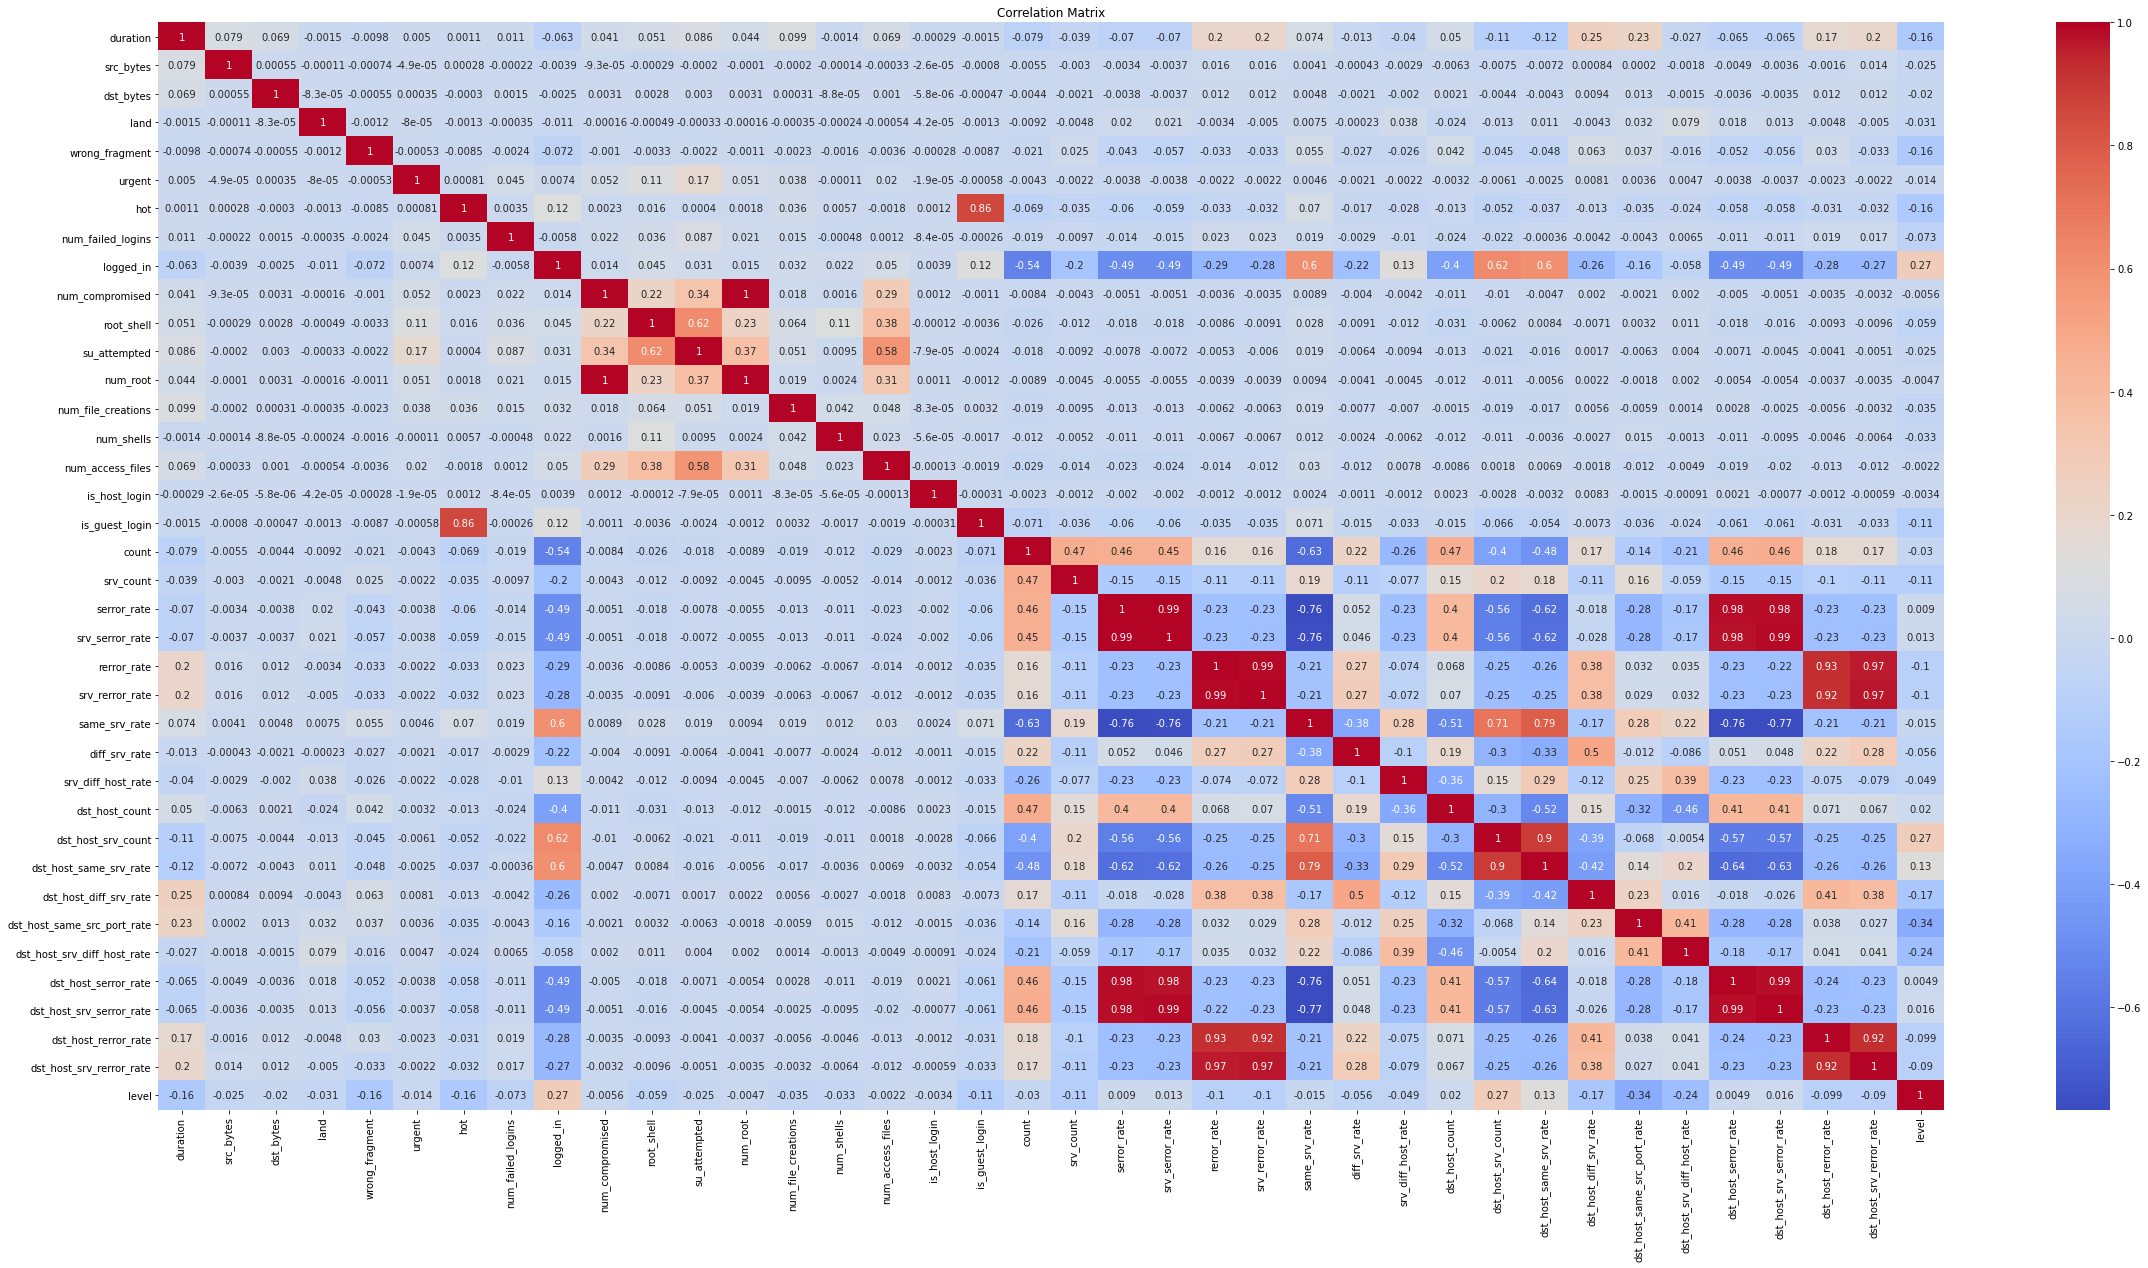

In [18]:
# # Correlation matrix for ordinal encoded
plt.figure(figsize=(40, 20))
sns.heatmap(X_ordinal_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Selection

#### Selecting the Top k Features OHE

In [19]:
# Select the top 10 features (k=10)
selector = SelectKBest(score_func=f_classif, k=10)
x_selected = selector.fit_transform(X_ohe_train, y_train)

# Get selected feature names
selected_features = X_ohe_train.columns[selector.get_support()]

# Display selected features
print("Selected Features:")
#print(selected_features)
for i, feature in enumerate(selected_features):
    print(i, ": ", feature)

Selected Features:
0 :  logged_in
1 :  serror_rate
2 :  srv_serror_rate
3 :  same_srv_rate
4 :  dst_host_srv_count
5 :  dst_host_same_srv_rate
6 :  dst_host_serror_rate
7 :  dst_host_srv_serror_rate
8 :  flag_S0
9 :  flag_SF


#### Selecting the Top k Features Ordinal

In [20]:
# Select the top 10 features (k=10)
selector = SelectKBest(score_func=f_classif, k=10)
x_selected = selector.fit_transform(X_ordinal_train, y_train)

# Get selected feature names
selected_ordinal_features = X_ordinal_train.columns[selector.get_support()]

# Display selected features
print("Selected Features:")
#print(selected_features)
for i, feature in enumerate(selected_ordinal_features):
    print(i, ": ", feature)

Selected Features:
0 :  logged_in
1 :  count
2 :  serror_rate
3 :  srv_serror_rate
4 :  same_srv_rate
5 :  dst_host_srv_count
6 :  dst_host_same_srv_rate
7 :  dst_host_serror_rate
8 :  dst_host_srv_serror_rate
9 :  level


### Modeling

In [21]:
def generate_heatmap(confusion_mat, title):
    sns.heatmap(data=confusion_mat, 
            xticklabels = ['Predicted Normal', 'Predicted Attack'],
           yticklabels = ['Actual Normal', 'Actual Attack'],
           cmap ='PiYG',
           fmt='d',
           annot=True,)
    plt.title(title)
    plt.show()

#### Random Forest OHE with All Features

In [22]:
start_time = time.time()
# Initialize the Random Forest classifier & train the model
rf_classifier = RandomForestClassifier(max_depth = None).fit(X_ohe_train, y_train)

# Prediction on the test set
y_pred_RF = rf_classifier.predict(X_ohe_test)
end_time = time.time()
RFA_time = end_time - start_time
print("%s seconds" % RFA_time)
print(y_pred_RF)

8.689005613327026 seconds
[0 1 1 ... 1 0 1]


Random Forest All Features Evaluation:
accuracy: 0.9993252629489978
precision: 0.9990602306706535
recall: 0.9994871794871795
F-1 score: 0.9992736594744713


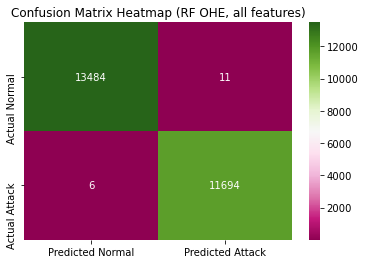

In [23]:
# Calculate for: accuracy, precision, recall, f1 score based on RF
confusion_mat_RFA = confusion_matrix(y_test, y_pred_RF)
tn, fp, fn, tp = confusion_mat_RFA.ravel()
RF_all_accuracy = (tp + tn)/(tn + fp + fn + tp)
RF_all_precision = tp/(tp + fp)
RF_all_recall = tp/(tp + fn)
RF_all_F1_score = 2 * (RF_all_precision * RF_all_recall)/(RF_all_precision + RF_all_recall)

print("Random Forest All Features Evaluation:")
print(f"accuracy: {RF_all_accuracy}")
print(f"precision: {RF_all_precision}")
print(f"recall: {RF_all_recall}")
print(f"F-1 score: {RF_all_F1_score}")
generate_heatmap(confusion_mat_RFA, "Confusion Matrix Heatmap (RF OHE, all features)")

#### Random Forest OHE with Selected Features

In [24]:
start_time = time.time()
# Initialize the Random Forest classifier & train the model
rf_classifier = RandomForestClassifier(max_depth = None).fit(X_ohe_train[selected_features], y_train)

# Prediction on the test set
y_pred_RF = rf_classifier.predict(X_ohe_test[selected_features])
end_time = time.time()
RFS_time = end_time - start_time
print("%s seconds" % RFS_time)
print(y_pred_RF)

6.2204015254974365 seconds
[1 1 1 ... 1 0 1]


Random Forest Selected Features Evaluation:
accuracy: 0.952093669378845
precision: 0.9598562538346919
recall: 0.935982905982906
F-1 score: 0.9477692673850014


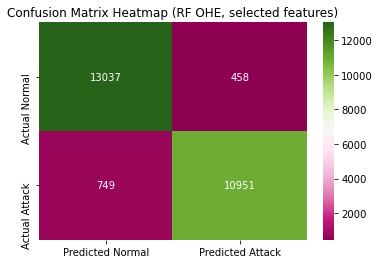

In [25]:
# Calculate for: accuracy, precision, recall, f1 score based on RF
confusion_mat_RFS = confusion_matrix(y_test, y_pred_RF)
tn, fp, fn, tp = confusion_mat_RFS.ravel()
RF_selected_accuracy = (tp + tn)/(tn + fp + fn + tp)
RF_selected_precision = tp/(tp + fp)
RF_selected_recall = tp/(tp + fn)
RF_selected_F1_score = 2 * (RF_selected_precision * RF_selected_recall)/(RF_selected_precision + RF_selected_recall)

print("Random Forest Selected Features Evaluation:")
print(f"accuracy: {RF_selected_accuracy}")
print(f"precision: {RF_selected_precision}")
print(f"recall: {RF_selected_recall}")
print(f"F-1 score: {RF_selected_F1_score}")
generate_heatmap(confusion_mat_RFS, "Confusion Matrix Heatmap (RF OHE, selected features)")

#### Random Forest Ordinal All Features

In [26]:
start_time = time.time()
# Initialize the Random Forest classifier & train the model
rf_classifier = RandomForestClassifier(max_depth = None).fit(X_ordinal_train, y_train)

# Prediction on the test set
y_pred_RF = rf_classifier.predict(X_ordinal_test)
end_time = time.time()
RFA_ordinal_time = end_time - start_time
print("%s seconds" % RFA_ordinal_time)
print(y_pred_RF)

8.945673942565918 seconds
[0 1 1 ... 1 0 1]


Random Forest Selected Features Evaluation:
accuracy: 0.9993649533637626
precision: 0.9990603109516487
recall: 0.9995726495726496
F-1 score: 0.9993164145945483


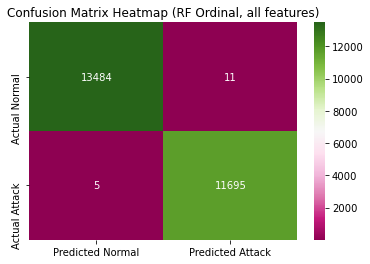

In [27]:
# Calculate for: accuracy, precision, recall, f1 score based on RF
confusion_mat_RFS = confusion_matrix(y_test, y_pred_RF)
tn, fp, fn, tp = confusion_mat_RFS.ravel()
RF_ordinal_all_accuracy = (tp + tn)/(tn + fp + fn + tp)
RF_ordinal_all_precision = tp/(tp + fp)
RF_ordinal_all_recall = tp/(tp + fn)
RF_ordinal_all_F1_score = 2 * (RF_ordinal_all_precision * RF_ordinal_all_recall)/(RF_ordinal_all_precision + RF_ordinal_all_recall)

print("Random Forest Selected Features Evaluation:")
print(f"accuracy: {RF_ordinal_all_accuracy}")
print(f"precision: {RF_ordinal_all_precision}")
print(f"recall: {RF_ordinal_all_recall}")
print(f"F-1 score: {RF_ordinal_all_F1_score}")
generate_heatmap(confusion_mat_RFS, "Confusion Matrix Heatmap (RF Ordinal, all features)")

#### Random Forest Ordinal Selected Features

In [28]:
start_time = time.time()
# Initialize the Random Forest classifier & train the model
rf_classifier = RandomForestClassifier(max_depth = None).fit(X_ordinal_train[selected_ordinal_features], y_train)

# Prediction on the test set
y_pred_RF = rf_classifier.predict(X_ordinal_test[selected_ordinal_features])
end_time = time.time()
RFS_ordinal_time = end_time - start_time
print("%s seconds" % RFS_ordinal_time)
print(y_pred_RF)

6.434638500213623 seconds
[1 1 1 ... 1 0 1]


Random Forest Selected Features Evaluation:
accuracy: 0.9940464377852749
precision: 0.9935053836950949
recall: 0.9936752136752137
F-1 score: 0.9935902914280831


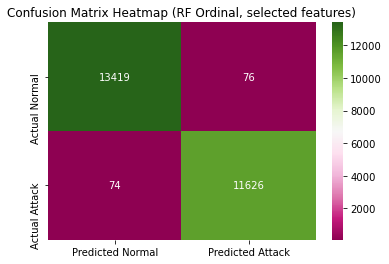

In [29]:
# Calculate for: accuracy, precision, recall, f1 score based on RF
confusion_mat_RFS = confusion_matrix(y_test, y_pred_RF)
tn, fp, fn, tp = confusion_mat_RFS.ravel()
RF_ordinal_selected_accuracy = (tp + tn)/(tn + fp + fn + tp)
RF_ordinal_selected_precision = tp/(tp + fp)
RF_ordinal_selected_recall = tp/(tp + fn)
RF_ordinal_selected_F1_score = 2 * (RF_ordinal_selected_precision * RF_ordinal_selected_recall)/(RF_ordinal_selected_precision + RF_ordinal_selected_recall)

print("Random Forest Selected Features Evaluation:")
print(f"accuracy: {RF_ordinal_selected_accuracy}")
print(f"precision: {RF_ordinal_selected_precision}")
print(f"recall: {RF_ordinal_selected_recall}")
print(f"F-1 score: {RF_ordinal_selected_F1_score}")
generate_heatmap(confusion_mat_RFS, "Confusion Matrix Heatmap (RF Ordinal, selected features)")

#### Logistic Regression OHE with All Features

In [30]:
start_time = time.time()
# Initialize the logistic regression model & train the model (max iterations set to 5000)
log_reg = LogisticRegression(max_iter=5000).fit(X_ohe_train, y_train)

# Predictions on the test set
y_pred_LR = log_reg.predict(X_ohe_test)
end_time = time.time()
LRA_time = end_time - start_time
print("%s seconds" % LRA_time)
print(y_pred_LR)

8.474702596664429 seconds
[1 1 1 ... 1 1 1]


Logistic Regression Evaluation:
accuracy: 0.8808493748759675
precision: 0.8767977820135159
recall: 0.864957264957265
F-1 score: 0.8708372773427415


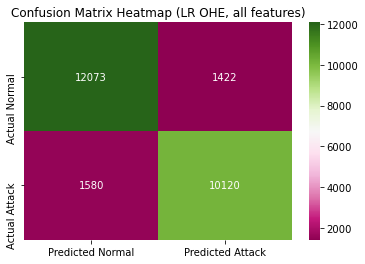

In [31]:
# Calculate for: accuracy, precision, recall, f1 score based on LR
confusion_mat_LRS = confusion_matrix(y_test, y_pred_LR)
tn, fp, fn, tp = confusion_mat_LRS.ravel()
LR_accuracy = (tp + tn)/(tn + fp + fn + tp)
LR_precision = tp/(tp + fp)
LR_recall = tp/(tp + fn)
LR_score = 2 * (LR_precision * LR_recall)/(LR_precision + LR_recall)

print("Logistic Regression Evaluation:")
print(f"accuracy: {LR_accuracy}")
print(f"precision: {LR_precision}")
print(f"recall: {LR_recall}")
print(f"F-1 score: {LR_score}")
generate_heatmap(confusion_mat_LRS, "Confusion Matrix Heatmap (LR OHE, all features)")

#### Logistic Regression OHE with Selected Features

In [32]:
start_time = time.time()
# Initialize the logistic regression model & train the model (max iterations set to 5000)
log_reg = LogisticRegression(max_iter=5000).fit(X_ohe_train[selected_features], y_train)

# Predictions on the test set
y_pred_LR = log_reg.predict(X_ohe_test[selected_features])
end_time = time.time()
LRS_time = end_time - start_time
print("%s seconds" % LRS_time)
print(y_pred_LR)

2.4042162895202637 seconds
[1 1 1 ... 1 0 1]


Logistic Regression Evaluation:
accuracy: 0.9040285770986307
precision: 0.92
recall: 0.8688888888888889
F-1 score: 0.8937142857142858


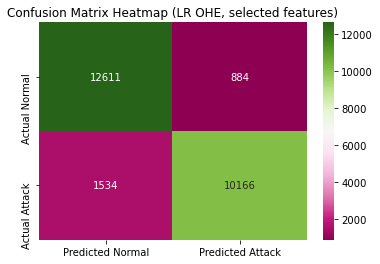

In [33]:
# Calculate for: accuracy, precision, recall, f1 score based on LR
confusion_mat_LRA = confusion_matrix(y_test, y_pred_LR)
tn, fp, fn, tp = confusion_mat_LRA.ravel()
LR_selected_accuracy = (tp + tn)/(tn + fp + fn + tp)
LR_selected_precision = tp/(tp + fp)
LR_selected_recall = tp/(tp + fn)
LR_selected_score = 2 * (LR_selected_precision * LR_selected_recall)/(LR_selected_precision + LR_selected_recall)

print("Logistic Regression Evaluation:")
print(f"accuracy: {LR_selected_accuracy}")
print(f"precision: {LR_selected_precision}")
print(f"recall: {LR_selected_recall}")
print(f"F-1 score: {LR_selected_score}")
generate_heatmap(confusion_mat_LRA, "Confusion Matrix Heatmap (LR OHE, selected features)")

#### Logistic Regression Ordinal with All Features

In [34]:
start_time = time.time()
# Initialize the logistic regression model & train the model (max iterations set to 5000)
log_reg = LogisticRegression(max_iter=5000).fit(X_ordinal_train, y_train)

# Predictions on the test set
y_pred_LR = log_reg.predict(X_ordinal_test)
end_time = time.time()
LRA_ordinal_time = end_time - start_time
print("%s seconds" % LRA_ordinal_time)
print(y_pred_LR)

3.746638536453247 seconds
[1 1 1 ... 1 1 1]


Logistic Regression Evaluation:
accuracy: 0.8806112323873785
precision: 0.8766684000693361
recall: 0.8645299145299146
F-1 score: 0.870556846544453


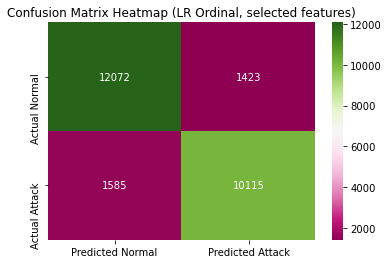

In [35]:
# Calculate for: accuracy, precision, recall, f1 score based on LR
confusion_mat_LRS = confusion_matrix(y_test, y_pred_LR)
tn, fp, fn, tp = confusion_mat_LRS.ravel()
LR_ordinal_all_accuracy = (tp + tn)/(tn + fp + fn + tp)
LR_ordinal_all_precision = tp/(tp + fp)
LR_ordinal_all_recall = tp/(tp + fn)
LR_ordinal_all_score = 2 * (LR_ordinal_all_precision * LR_ordinal_all_recall)/(LR_ordinal_all_precision + LR_ordinal_all_recall)

print("Logistic Regression Evaluation:")
print(f"accuracy: {LR_ordinal_all_accuracy}")
print(f"precision: {LR_ordinal_all_precision}")
print(f"recall: {LR_ordinal_all_recall}")
print(f"F-1 score: {LR_ordinal_all_score}")
generate_heatmap(confusion_mat_LRS, "Confusion Matrix Heatmap (LR Ordinal, selected features)")

#### Logistic Regression Ordinal with Selected Features

In [36]:
start_time = time.time()
# Initialize the logistic regression model & train the model (max iterations set to 5000)
log_reg = LogisticRegression(max_iter=5000).fit(X_ordinal_train[selected_ordinal_features], y_train)

# Predictions on the test set
y_pred_LR = log_reg.predict(X_ordinal_test[selected_ordinal_features])
end_time = time.time()
LRS_ordinal_time = end_time - start_time
print("%s seconds" % LRS_ordinal_time)
print(y_pred_LR)

4.84569525718689 seconds
[1 1 1 ... 1 0 1]


Logistic Regression Evaluation:
accuracy: 0.9567771383210955
precision: 0.9482889733840304
recall: 0.9592307692307692
F-1 score: 0.9537284894837476


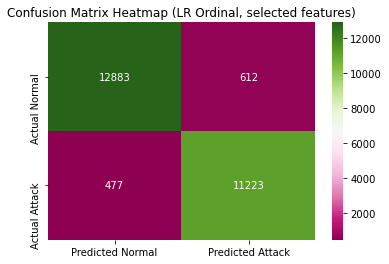

In [37]:
# Calculate for: accuracy, precision, recall, f1 score based on LR
confusion_mat_LRS = confusion_matrix(y_test, y_pred_LR)
tn, fp, fn, tp = confusion_mat_LRS.ravel()
LR_ordinal_selected_accuracy = (tp + tn)/(tn + fp + fn + tp)
LR_ordinal_selected_precision = tp/(tp + fp)
LR_ordinal_selected_recall = tp/(tp + fn)
LR_ordinal_selected_score = 2 * (LR_ordinal_selected_precision * LR_ordinal_selected_recall)/(LR_ordinal_selected_precision + LR_ordinal_selected_recall)

print("Logistic Regression Evaluation:")
print(f"accuracy: {LR_ordinal_selected_accuracy}")
print(f"precision: {LR_ordinal_selected_precision}")
print(f"recall: {LR_ordinal_selected_recall}")
print(f"F-1 score: {LR_ordinal_selected_score}")
generate_heatmap(confusion_mat_LRS, "Confusion Matrix Heatmap (LR Ordinal, selected features)")

#### Neural Network OHE with All Features

In [38]:
start_time = time.time()
# Build the neural network model
# Initialize the NN model & train the model
model_NN = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_ohe_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_NN.fit(X_ohe_train, y_train, epochs=10, batch_size=32, validation_data=(X_ohe_test, y_test))

# Predictions on the test set & converting to binary prediction
y_pred_NN = (model_NN.predict(X_ohe_test) > 0.5)
end_time = time.time()
NNA_time = end_time - start_time
print("%s seconds" % NNA_time)

Epoch 1/10
3150/3150 [==============================] - 7s 2ms/step - loss: 1162.8080 - accuracy: 0.9201 - val_loss: 2650.9011 - val_accuracy: 0.8564
Epoch 2/10
3150/3150 [==============================] - 6s 2ms/step - loss: 1588.7860 - accuracy: 0.9504 - val_loss: 714.2236 - val_accuracy: 0.9703
Epoch 3/10
3150/3150 [==============================] - 7s 2ms/step - loss: 849.6270 - accuracy: 0.9573 - val_loss: 85.3201 - val_accuracy: 0.9698
Epoch 4/10
3150/3150 [==============================] - 7s 2ms/step - loss: 705.8094 - accuracy: 0.9691 - val_loss: 970.1825 - val_accuracy: 0.9161
Epoch 5/10
3150/3150 [==============================] - 7s 2ms/step - loss: 2417.3728 - accuracy: 0.9448 - val_loss: 272.1195 - val_accuracy: 0.9580
Epoch 6/10
3150/3150 [==============================] - 7s 2ms/step - loss: 1901.0376 - accuracy: 0.9642 - val_loss: 4751.2622 - val_accuracy: 0.9654
Epoch 7/10
3150/3150 [==============================] - 7s 2ms/step - loss: 1520.7922 - accuracy: 0.9601 - 

Nueral Network Evaluation:
accuracy: 0.9630879142687041
precision: 0.945925803246108
recall: 0.9763247863247864
F-1 score: 0.9608849259757739


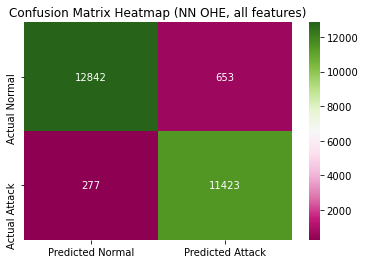

In [39]:
# Calculate for: accuracy, precision, recall, f1 score based on NN
confusion_mat_NNA = confusion_matrix(y_test, y_pred_NN)
tn, fp, fn, tp = confusion_mat_NNA.ravel()
NN_accuracy = (tp + tn)/(tn + fp + fn + tp)
NN_precision = tp/(tp + fp)
NN_recall = tp/(tp + fn)
NN_score = 2 * (NN_precision * NN_recall)/(NN_precision + NN_recall)

print("Nueral Network Evaluation:")
print(f"accuracy: {NN_accuracy}")
print(f"precision: {NN_precision}")
print(f"recall: {NN_recall}")
print(f"F-1 score: {NN_score}")
generate_heatmap(confusion_mat_NNA, "Confusion Matrix Heatmap (NN OHE, all features)")

#### Neural Network OHE with Selected Features

In [40]:
start_time = time.time()
# Build the neural network model
# Initialize the NN model & train the model
model_NN = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_NN.fit(X_ohe_train[selected_features], y_train, epochs=10, batch_size=32, validation_data=(X_ohe_test[selected_features], y_test))

# Predictions on the test set & converting to binary prediction
y_pred_NN = (model_NN.predict(X_ohe_test[selected_features]) > 0.5)
end_time = time.time()
NNS_time = end_time - start_time
print("%s seconds" % NNS_time)

Epoch 1/10
3150/3150 [==============================] - 8s 2ms/step - loss: 0.2334 - accuracy: 0.9066 - val_loss: 0.1970 - val_accuracy: 0.9183
Epoch 2/10
3150/3150 [==============================] - 7s 2ms/step - loss: 0.1964 - accuracy: 0.9165 - val_loss: 0.1751 - val_accuracy: 0.9205
Epoch 3/10
3150/3150 [==============================] - 7s 2ms/step - loss: 0.1841 - accuracy: 0.9221 - val_loss: 0.1729 - val_accuracy: 0.9253
Epoch 4/10
3150/3150 [==============================] - 6s 2ms/step - loss: 0.1790 - accuracy: 0.9250 - val_loss: 0.1709 - val_accuracy: 0.9242
Epoch 5/10
3150/3150 [==============================] - 6s 2ms/step - loss: 0.1743 - accuracy: 0.9261 - val_loss: 0.1868 - val_accuracy: 0.9196
Epoch 6/10
3150/3150 [==============================] - 6s 2ms/step - loss: 0.1715 - accuracy: 0.9263 - val_loss: 0.1723 - val_accuracy: 0.9229
Epoch 7/10
3150/3150 [==============================] - 7s 2ms/step - loss: 0.1694 - accuracy: 0.9278 - val_loss: 0.1661 - val_accuracy:

Nueral Network Evaluation:
accuracy: 0.9251835681682874
precision: 0.9623174752708431
recall: 0.8730769230769231
F-1 score: 0.9155276719695271


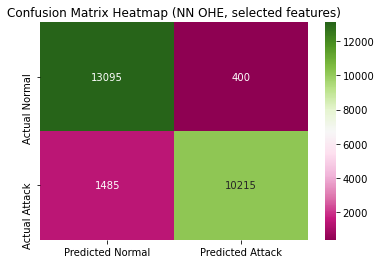

In [41]:
# Calculate for: accuracy, precision, recall, f1 score based on NN
confusion_mat_NNS = confusion_matrix(y_test, y_pred_NN)
tn, fp, fn, tp = confusion_mat_NNS.ravel()
NN_selected_accuracy = (tp + tn)/(tn + fp + fn + tp)
NN_selected_precision = tp/(tp + fp)
NN_selected_recall = tp/(tp + fn)
NN_selected_score = 2 * (NN_selected_precision * NN_selected_recall)/(NN_selected_precision + NN_selected_recall)

print("Nueral Network Evaluation:")
print(f"accuracy: {NN_selected_accuracy}")
print(f"precision: {NN_selected_precision}")
print(f"recall: {NN_selected_recall}")
print(f"F-1 score: {NN_selected_score}")
generate_heatmap(confusion_mat_NNS, "Confusion Matrix Heatmap (NN OHE, selected features)")

#### Neural Network Ordinal with All Features

In [42]:
start_time = time.time()
# Build the neural network model
# Initialize the NN model & train the model
model_NN = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_ordinal_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_NN.fit(X_ordinal_train, y_train, epochs=10, batch_size=32, validation_data=(X_ordinal_test, y_test))

# Predictions on the test set & converting to binary prediction
y_pred_NN = (model_NN.predict(X_ordinal_test) > 0.5)
end_time = time.time()
NNA_ordinal_time = end_time - start_time
print("%s seconds" % NNA_ordinal_time)

Epoch 1/10
3150/3150 [==============================] - 7s 2ms/step - loss: 1466.5316 - accuracy: 0.9081 - val_loss: 579.0063 - val_accuracy: 0.9386
Epoch 2/10
3150/3150 [==============================] - 7s 2ms/step - loss: 4353.8594 - accuracy: 0.9306 - val_loss: 6959.7637 - val_accuracy: 0.9332
Epoch 3/10
3150/3150 [==============================] - 7s 2ms/step - loss: 4613.1484 - accuracy: 0.9467 - val_loss: 257.0630 - val_accuracy: 0.9346
Epoch 4/10
3150/3150 [==============================] - 7s 2ms/step - loss: 4395.0420 - accuracy: 0.9450 - val_loss: 467.0744 - val_accuracy: 0.9597
Epoch 5/10
3150/3150 [==============================] - 7s 2ms/step - loss: 4887.2925 - accuracy: 0.9560 - val_loss: 5231.5483 - val_accuracy: 0.9621
Epoch 6/10
3150/3150 [==============================] - 7s 2ms/step - loss: 8840.9629 - accuracy: 0.9541 - val_loss: 11323.5840 - val_accuracy: 0.9685
Epoch 7/10
3150/3150 [==============================] - 7s 2ms/step - loss: 6453.1621 - accuracy: 0.96

Nueral Network Evaluation:
accuracy: 0.9577693986902163
precision: 0.9470410221923335
recall: 0.962905982905983
F-1 score: 0.9549076114595695


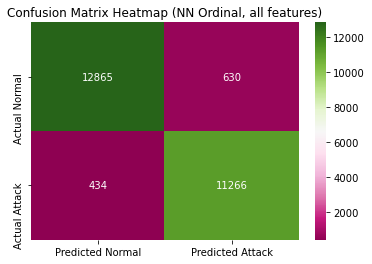

In [43]:
# Calculate for: accuracy, precision, recall, f1 score based on NN
confusion_mat_NNS = confusion_matrix(y_test, y_pred_NN)
tn, fp, fn, tp = confusion_mat_NNS.ravel()
NN_ordinal_all_accuracy = (tp + tn)/(tn + fp + fn + tp)
NN_ordinal_all_precision = tp/(tp + fp)
NN_ordinal_all_recall = tp/(tp + fn)
NN_ordinal_all_score = 2 * (NN_ordinal_all_precision * NN_ordinal_all_recall)/(NN_ordinal_all_precision + NN_ordinal_all_recall)

print("Nueral Network Evaluation:")
print(f"accuracy: {NN_ordinal_all_accuracy}")
print(f"precision: {NN_ordinal_all_precision}")
print(f"recall: {NN_ordinal_all_recall}")
print(f"F-1 score: {NN_ordinal_all_score}")
generate_heatmap(confusion_mat_NNS, "Confusion Matrix Heatmap (NN Ordinal, all features)")

#### Neural Network Ordinal with Selected Features

In [44]:
start_time = time.time()
# Build the neural network model
# Initialize the NN model & train the model
model_NN = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(selected_ordinal_features),)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_NN.fit(X_ordinal_train[selected_ordinal_features], y_train, epochs=10, batch_size=32, validation_data=(X_ordinal_test[selected_ordinal_features], y_test))

# Predictions on the test set & converting to binary prediction
y_pred_NN = (model_NN.predict(X_ordinal_test[selected_ordinal_features]) > 0.5)
end_time = time.time()
NNS_ordinal_time = end_time - start_time
print("%s seconds" % NNS_ordinal_time)

Epoch 1/10
3150/3150 [==============================] - 7s 2ms/step - loss: 0.1810 - accuracy: 0.9375 - val_loss: 0.1141 - val_accuracy: 0.9625
Epoch 2/10
3150/3150 [==============================] - 6s 2ms/step - loss: 0.1072 - accuracy: 0.9638 - val_loss: 0.0855 - val_accuracy: 0.9715
Epoch 3/10
3150/3150 [==============================] - 6s 2ms/step - loss: 0.0933 - accuracy: 0.9687 - val_loss: 0.0742 - val_accuracy: 0.9742
Epoch 4/10
3150/3150 [==============================] - 7s 2ms/step - loss: 0.0816 - accuracy: 0.9719 - val_loss: 0.0808 - val_accuracy: 0.9748
Epoch 5/10
3150/3150 [==============================] - 7s 2ms/step - loss: 0.0738 - accuracy: 0.9743 - val_loss: 0.0658 - val_accuracy: 0.9774
Epoch 6/10
3150/3150 [==============================] - 6s 2ms/step - loss: 0.0677 - accuracy: 0.9764 - val_loss: 0.0669 - val_accuracy: 0.9775
Epoch 7/10
3150/3150 [==============================] - 6s 2ms/step - loss: 0.0636 - accuracy: 0.9768 - val_loss: 0.0661 - val_accuracy:

Nueral Network Evaluation:
accuracy: 0.9819408612820004
precision: 0.9848236612917134
recall: 0.9761538461538461
F-1 score: 0.9804695883590162


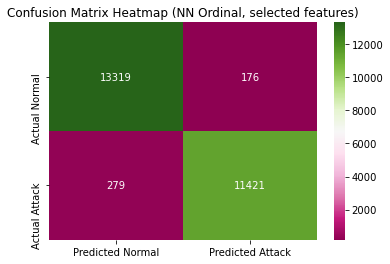

In [45]:
# Calculate for: accuracy, precision, recall, f1 score based on NN
confusion_mat_NNS = confusion_matrix(y_test, y_pred_NN)
tn, fp, fn, tp = confusion_mat_NNS.ravel()
NN_ordinal_selected_accuracy = (tp + tn)/(tn + fp + fn + tp)
NN_ordinal_selected_precision = tp/(tp + fp)
NN_ordinal_selected_recall = tp/(tp + fn)
NN_ordinal_selected_score = 2 * (NN_ordinal_selected_precision * NN_ordinal_selected_recall)/(NN_ordinal_selected_precision + NN_ordinal_selected_recall)

print("Nueral Network Evaluation:")
print(f"accuracy: {NN_ordinal_selected_accuracy}")
print(f"precision: {NN_ordinal_selected_precision}")
print(f"recall: {NN_ordinal_selected_recall}")
print(f"F-1 score: {NN_ordinal_selected_score}")
generate_heatmap(confusion_mat_NNS, "Confusion Matrix Heatmap (NN Ordinal, selected features)")

#### Comparing Model Performance

In [46]:
#Data for the models
models = ['Random Forest OHE', 'Random Forest OHE Lim.', 'Random Forest Ord.', 'Random Forest Ord. Lim.', 
          'Logistic Reg. OHE', 'Logistic Reg. OHE Lim.', 'Logistic Reg. Ord.', 'Logistic Reg. Ord. Lim.',
          'Neural Net. OHE', 'Neural Net. OHE Lim.', 'Neural Net. Ord.', 'Neural Net. Ord. Lim.']
accuracies = [RF_all_accuracy, RF_selected_accuracy, RF_ordinal_all_accuracy, RF_ordinal_selected_accuracy,
              LR_accuracy, LR_selected_accuracy, LR_ordinal_all_accuracy, LR_ordinal_selected_accuracy,
              NN_accuracy, NN_selected_accuracy, NN_ordinal_all_accuracy, NN_ordinal_selected_accuracy]
precisions = [RF_all_precision, RF_selected_precision, RF_ordinal_all_precision, RF_ordinal_selected_precision,
              LR_precision, LR_selected_precision, LR_ordinal_all_precision, LR_ordinal_selected_precision,
              NN_precision, NN_selected_precision, NN_ordinal_all_precision, NN_ordinal_selected_precision]
recalls = [RF_all_recall, RF_selected_recall, RF_ordinal_all_recall, RF_ordinal_selected_recall,
           LR_recall, LR_selected_recall, LR_ordinal_all_recall, LR_ordinal_selected_recall,
           NN_recall, NN_selected_recall, NN_ordinal_all_recall, NN_ordinal_selected_recall]
f1_scores = [RF_all_F1_score, RF_selected_F1_score, RF_ordinal_all_F1_score, RF_ordinal_selected_F1_score,
             LR_score, LR_selected_score, LR_ordinal_all_score, LR_ordinal_selected_score,
             NN_score, NN_selected_score, NN_ordinal_all_score, NN_ordinal_selected_score]
times = [RFA_time, RFS_time, RFA_ordinal_time, RFS_ordinal_time,
         LRA_time, LRS_time, LRA_ordinal_time, LRS_ordinal_time,
         NNA_time, NNS_time, NNA_ordinal_time, NNS_ordinal_time]

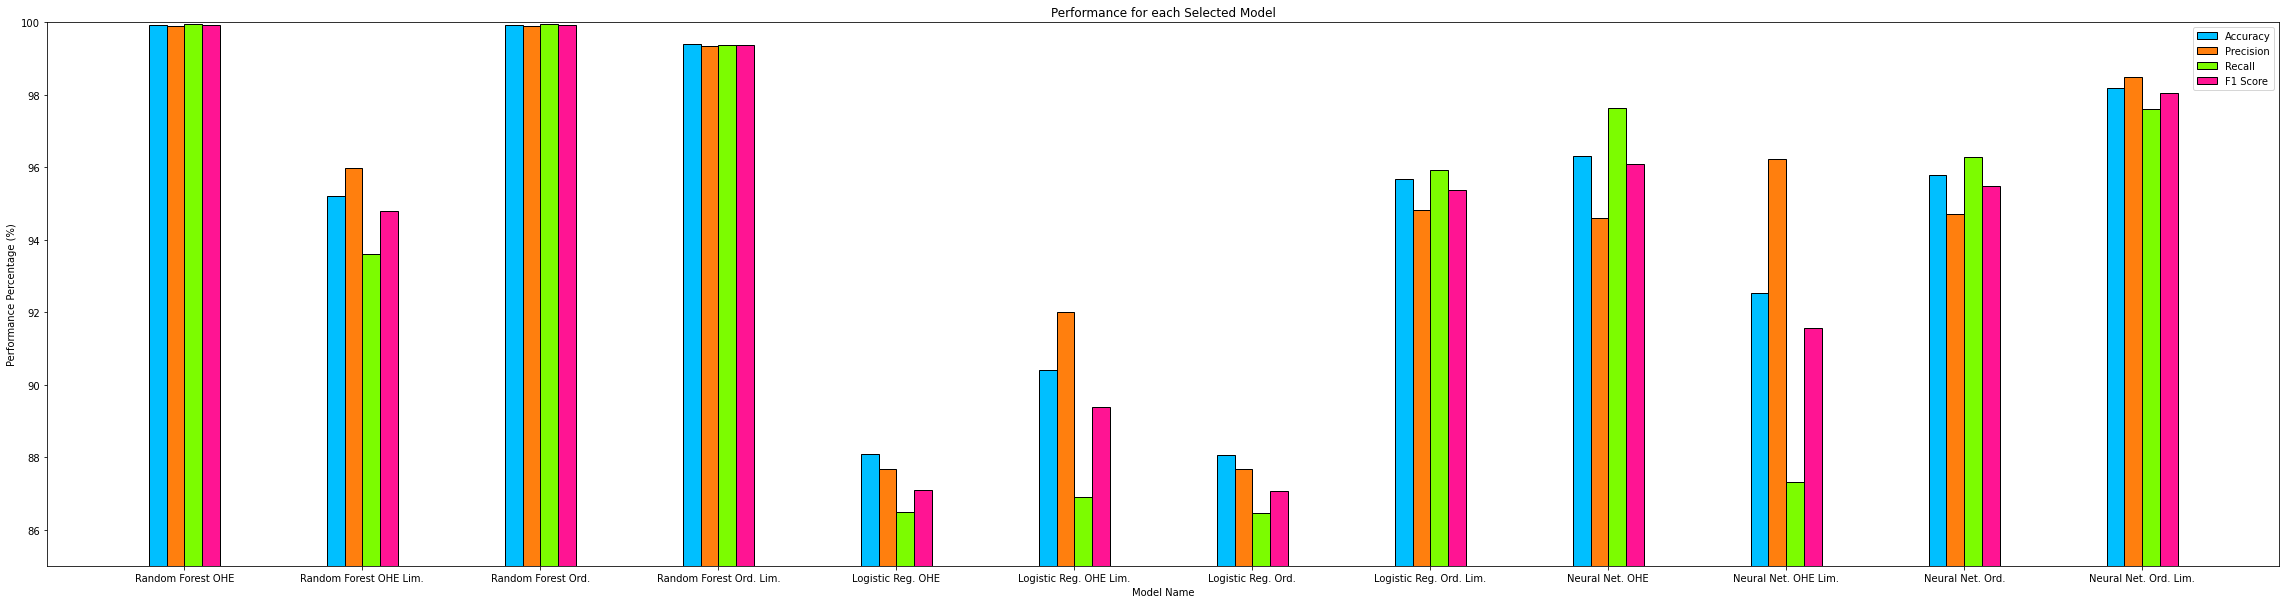

In [47]:
# converting to %
accuracies_per = [x * 100 for x in accuracies]
precisions_per = [x * 100 for x in precisions]
recalls_per = [x * 100 for x in recalls]
f1_scores_per = [x * 100 for x in f1_scores]

# Plotting
r1 = np.arange(len(models))
r2 = [x + 0.1 for x in r1]
r3 = [x + 0.1 for x in r2]
r4 = [x + 0.1 for x in r3]

plt.figure(figsize=(40, 10))
# accuracy bars
plt.bar(r1, accuracies_per, color='deepskyblue', width=0.1, edgecolor='black', label='Accuracy')
#precision bars
plt.bar(r2, precisions_per, color='tab:orange', width=0.1, edgecolor='black', label='Precision')
#recall bars
plt.bar(r3, recalls_per, color='lawngreen', width=0.1, edgecolor='black', label='Recall')
#F1 score bars
plt.bar(r4, f1_scores_per, color='deeppink', width=0.1, edgecolor='black', label='F1 Score')

plt.title('Performance for each Selected Model')
plt.xticks([r + 0.15 for r in range(len(models))], models)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel("Model Name")
plt.ylabel("Performance Percentage (%)")
plt.ylim([85, 100])
plt.show()

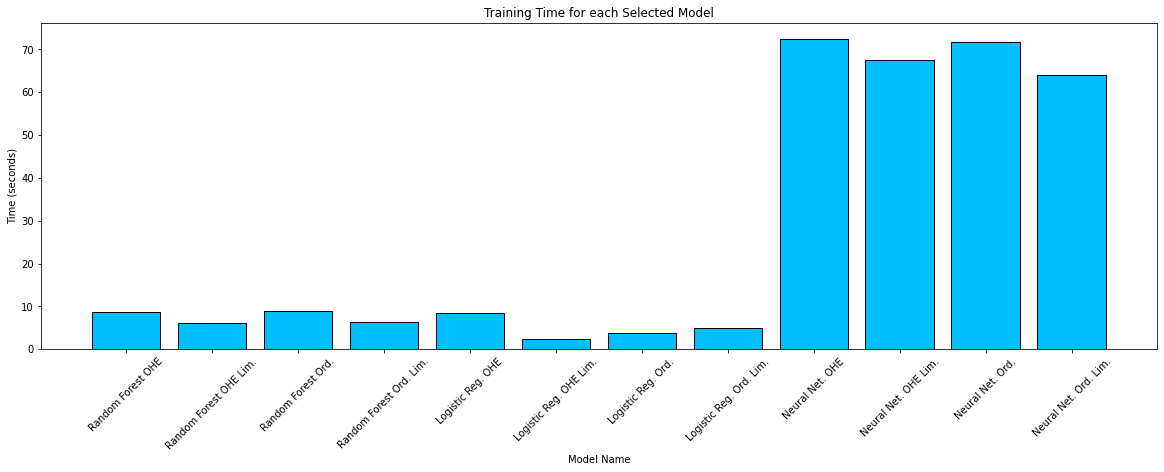

In [48]:
# Plotting
plt.figure(figsize=(20, 6))
plt.bar(models, times, color='deepskyblue', edgecolor='black')
plt.title('Training Time for each Selected Model')
plt.xlabel("Model Name")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=45)
plt.show()

#### Selected Features VS All Features

In [49]:
#Versus data for the models
sel_vs_models = ['Random Forest OHE', 'Random Forest Ordinal', 
             'Logistic Regression OHE', 'Logistic Regression Ordinal',
             'Neural Network OHE', 'Neural Network Ordinal']
sel_vs_accuracies = [RF_all_accuracy - RF_selected_accuracy, RF_ordinal_all_accuracy - RF_ordinal_selected_accuracy,
              LR_accuracy - LR_selected_accuracy, LR_ordinal_all_accuracy - LR_ordinal_selected_accuracy,
              NN_accuracy - NN_selected_accuracy, NN_ordinal_all_accuracy - NN_ordinal_selected_accuracy]
sel_vs_precisions = [RF_all_precision - RF_selected_precision, RF_ordinal_all_precision - RF_ordinal_selected_precision,
              LR_precision - LR_selected_precision, LR_ordinal_all_precision - LR_ordinal_selected_precision,
              NN_precision - NN_selected_precision, NN_ordinal_all_precision - NN_ordinal_selected_precision]
sel_vs_recalls = [RF_all_recall - RF_selected_recall, RF_ordinal_all_recall - RF_ordinal_selected_recall,
           LR_recall - LR_selected_recall, LR_ordinal_all_recall - LR_ordinal_selected_recall,
           NN_recall - NN_selected_recall, NN_ordinal_all_recall - NN_ordinal_selected_recall]
sel_vs_f1_scores = [RF_all_F1_score - RF_selected_F1_score, RF_ordinal_all_F1_score - RF_ordinal_selected_F1_score,
             LR_score - LR_selected_score, LR_ordinal_all_score - LR_ordinal_selected_score,
             NN_score - NN_selected_score, NN_ordinal_all_score - NN_ordinal_selected_score]
all_times = [RFA_time, RFA_ordinal_time, 
            LRA_time, LRA_ordinal_time,
            NNA_time, NNA_ordinal_time]
selected_times = [RFS_time, RFS_ordinal_time, 
            LRS_time, LRS_ordinal_time,
            NNS_time, NNS_ordinal_time]

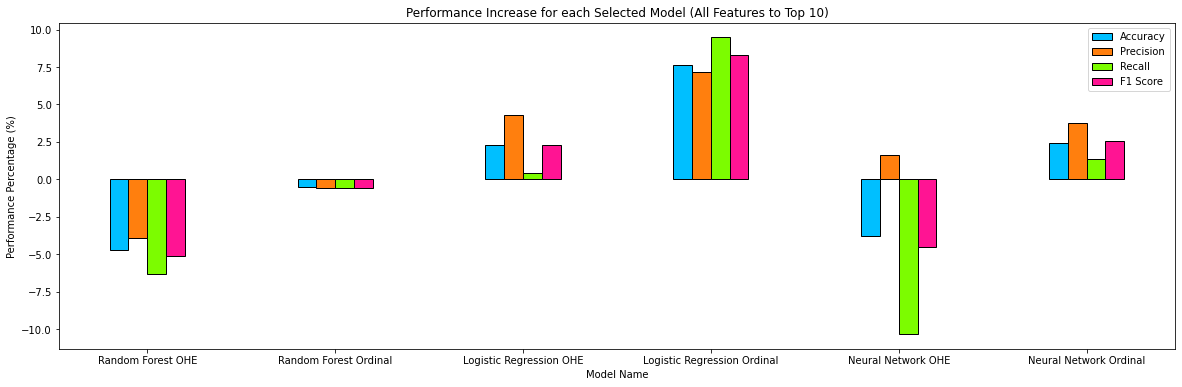

In [50]:
# converting to %
sel_vs_accuracies_per = [x * 100 for x in sel_vs_accuracies]
sel_vs_precisions_per = [x * 100 for x in sel_vs_precisions]
sel_vs_recalls_per = [x * 100 for x in sel_vs_recalls]
sel_vs_f1_scores_per = [x * 100 for x in sel_vs_f1_scores]

#Switching around so up = good on graph
sel_vs_accuracies_per = [-x for x in sel_vs_accuracies_per]
sel_vs_precisions_per = [-x for x in sel_vs_precisions_per]
sel_vs_recalls_per = [-x for x in sel_vs_recalls_per]
sel_vs_f1_scores_per = [-x for x in sel_vs_f1_scores_per]

# Plotting
r1 = np.arange(len(sel_vs_models))
r2 = [x + 0.1 for x in r1]
r3 = [x + 0.1 for x in r2]
r4 = [x + 0.1 for x in r3]

plt.figure(figsize=(20, 6))
# accuracy bars
plt.bar(r1, sel_vs_accuracies_per, color='deepskyblue', width=0.1, edgecolor='black', label='Accuracy')
#precision bars
plt.bar(r2, sel_vs_precisions_per, color='tab:orange', width=0.1, edgecolor='black', label='Precision')
#recall bars
plt.bar(r3, sel_vs_recalls_per, color='lawngreen', width=0.1, edgecolor='black', label='Recall')
#F1 score bars
plt.bar(r4, sel_vs_f1_scores_per, color='deeppink', width=0.1, edgecolor='black', label='F1 Score')

plt.title('Performance Increase for each Selected Model (All Features to Top 10)')
plt.xticks([r + 0.15 for r in range(len(sel_vs_models))], sel_vs_models)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel("Model Name")
plt.ylabel("Performance Percentage (%)")
plt.show()

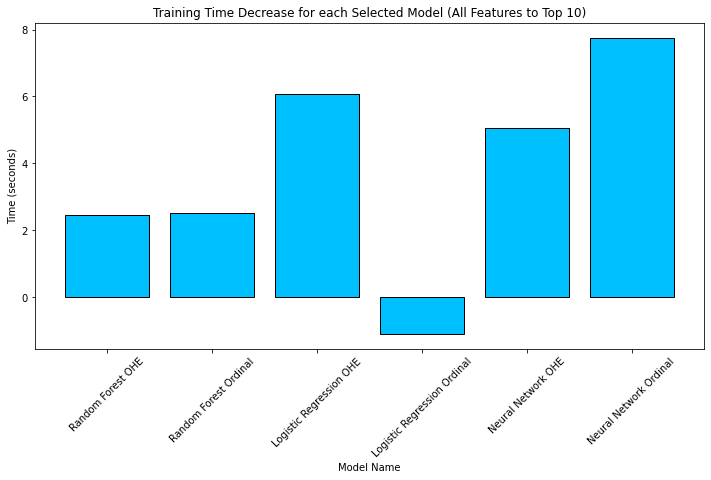

In [51]:
# Calculate time decreases
decreases = [(non_sel - sel) for sel, non_sel in zip(selected_times, all_times)]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(sel_vs_models, decreases, color='deepskyblue', edgecolor='black')
plt.title('Training Time Decrease for each Selected Model (All Features to Top 10)')
plt.xlabel("Model Name")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=45)
plt.show()

In [52]:
# Calculate percentage decrease
#percentage_decreases = [(1 - (sel / non_sel)) * 100 for sel, non_sel in zip(selected_times, all_times)]

# Plotting
#plt.figure(figsize=(12, 6))
#plt.bar(sel_vs_models, percentage_decreases, color='deepskyblue', edgecolor='black')
#plt.title('Training Time Decrease for each Selected Model')
#plt.xlabel("Model Name")
#plt.ylabel("Time Percentage (%)")
#plt.xticks(rotation=45)
#plt.show()

#### OHE VS Ordinal Encoding

In [53]:
#Versus data for the models
OHE_vs_models = ['Random Forest', 'Random Forest Lim.', 
             'Logistic Regression', 'Logistic Regression Lim.',
             'Neural Network', 'Neural Network Lim.']
OHE_vs_accuracies = [RF_all_accuracy - RF_ordinal_all_accuracy, RF_selected_accuracy - RF_ordinal_selected_accuracy,
              LR_accuracy - LR_ordinal_all_accuracy, LR_selected_accuracy - LR_ordinal_selected_accuracy,
              NN_accuracy - NN_ordinal_all_accuracy, NN_selected_accuracy - NN_ordinal_selected_accuracy]
OHE_vs_precisions = [RF_all_precision - RF_ordinal_all_precision, RF_selected_precision - RF_ordinal_selected_precision,
              LR_precision - LR_ordinal_all_precision, LR_selected_precision - LR_ordinal_selected_precision,
              NN_precision - NN_ordinal_all_precision, NN_selected_precision - NN_ordinal_selected_precision]
OHE_vs_recalls = [RF_all_recall - RF_ordinal_all_recall, RF_selected_recall - RF_ordinal_selected_recall,
           LR_recall - LR_ordinal_all_recall, LR_selected_recall - LR_ordinal_selected_recall,
           NN_recall - NN_ordinal_all_recall, NN_selected_recall - NN_ordinal_selected_recall]
OHE_vs_f1_scores = [RF_all_F1_score - RF_ordinal_all_F1_score, RF_selected_F1_score - RF_ordinal_selected_F1_score,
             LR_score - LR_ordinal_all_score, LR_selected_score - LR_ordinal_selected_score,
             NN_score - NN_ordinal_all_score, NN_selected_score - NN_ordinal_selected_score]
OHE_times = [RFA_time, RFS_time, 
            LRA_time, LRS_time,
            NNA_time, NNS_time]
ordinal_times = [RFA_ordinal_time, RFS_ordinal_time, 
            LRA_ordinal_time, LRS_ordinal_time,
            NNA_ordinal_time, NNS_ordinal_time]

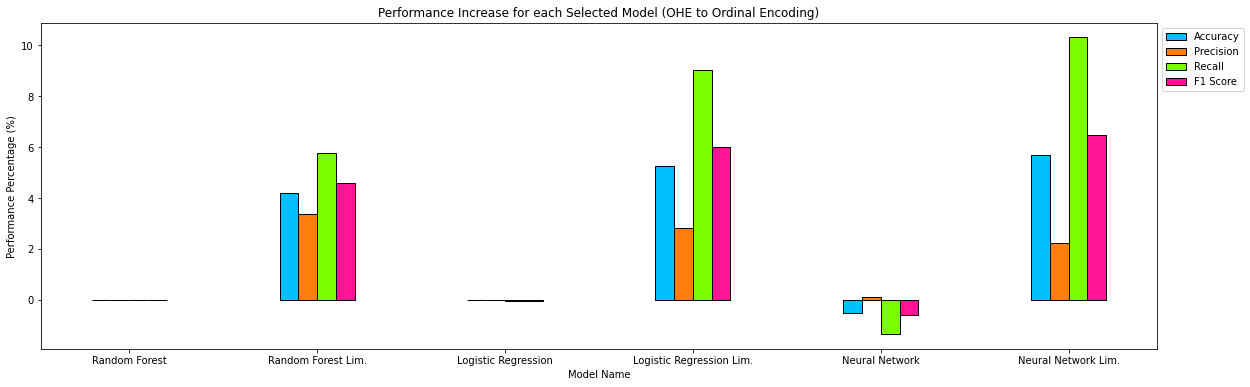

In [54]:
# converting to %
OHE_vs_accuracies_per = [x * 100 for x in OHE_vs_accuracies]
OHE_vs_precisions_per = [x * 100 for x in OHE_vs_precisions]
OHE_vs_recalls_per = [x * 100 for x in OHE_vs_recalls]
OHE_vs_f1_scores_per = [x * 100 for x in OHE_vs_f1_scores]

#Switching around so up = good on graph
OHE_vs_accuracies_per = [-x for x in OHE_vs_accuracies_per]
OHE_vs_precisions_per = [-x for x in OHE_vs_precisions_per]
OHE_vs_recalls_per = [-x for x in OHE_vs_recalls_per]
OHE_vs_f1_scores_per = [-x for x in OHE_vs_f1_scores_per]

# Plotting
r1 = np.arange(len(OHE_vs_models))
r2 = [x + 0.1 for x in r1]
r3 = [x + 0.1 for x in r2]
r4 = [x + 0.1 for x in r3]

plt.figure(figsize=(20, 6))
# accuracy bars
plt.bar(r1, OHE_vs_accuracies_per, color='deepskyblue', width=0.1, edgecolor='black', label='Accuracy')
#precision bars
plt.bar(r2, OHE_vs_precisions_per, color='tab:orange', width=0.1, edgecolor='black', label='Precision')
#recall bars
plt.bar(r3, OHE_vs_recalls_per, color='lawngreen', width=0.1, edgecolor='black', label='Recall')
#F1 score bars
plt.bar(r4, OHE_vs_f1_scores_per, color='deeppink', width=0.1, edgecolor='black', label='F1 Score')

plt.title('Performance Increase for each Selected Model (OHE to Ordinal Encoding)')
plt.xticks([r + 0.15 for r in range(len(OHE_vs_models))], OHE_vs_models)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel("Model Name")
plt.ylabel("Performance Percentage (%)")
plt.show()

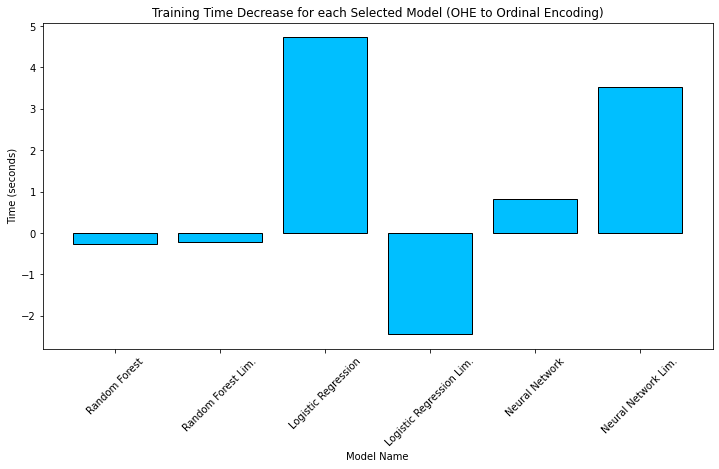

In [55]:
# Calculate time decreases
decreases = [(ohe - ordinal) for ordinal, ohe in zip(ordinal_times, OHE_times)]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(OHE_vs_models, decreases, color='deepskyblue', edgecolor='black')
plt.title('Training Time Decrease for each Selected Model (OHE to Ordinal Encoding)')
plt.xlabel("Model Name")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=45)
plt.show()

### Conclusion

In conclusion, Random Forest model performed better in comparison to the other selected models (Logistic Regression and Neural Network). The second best performance came from the Neural Network model, which performed 3-4% lower than the Random Forest model. Logistic Regression performed the worst, which performed 8-10% lower than the Random Forest model. <br>

Feature selection was investigated as well for this project. Each model was trained using all features, which can lead to overfitting during model training. This is due to the model potentially learning irrelevant patterns from features that are not as general. When selecting features, there should be a balance in how generalized or specific it is to a particular attack. In this instance, a correlation matrix of the features can help visualize which features might be important. An example of a feature that should not be taken into consideration is "num_outbound_cmds", where there is only one unique value throughout the entire dataset. <br>

The last thing that was investigated was how the method for encoding the dataset impacted the performance for each model. The two encoding methods used would include one hot encoding and ordinal encoding. The encoding method provided shifts in the top k features being generated. The performance did not change when all features were used to train each model. Instead, there was an increase in performance when the selected features were used. The selected features that were generated from the ordinal encoding performed significantly better than the selected features from one hot encoding. <br>

For a quick reference, we decided to get the top 10 features using the sklearn library's feature selection. The top 10 features that were generated would include:<br>

OHE:<br>
0 :  logged_in <br>
1 :  serror_rate <br>
2 :  srv_serror_rate <br>
3 :  same_srv_rate <br>
4 :  dst_host_srv_count <br>
5 :  dst_host_same_srv_rate <br>
6 :  dst_host_serror_rate <br>
7 :  dst_host_srv_serror_rate <br>
8 :  flag_S0 <br>
9 :  flag_SF <br>

Ordinal Encoding:<br>
0 :  logged_in<br>
1 :  count<br>
2 :  serror_rate<br>
3 :  srv_serror_rate<br>
4 :  same_srv_rate<br>
5 :  dst_host_srv_count<br>
6 :  dst_host_same_srv_rate<br>
7 :  dst_host_serror_rate<br>
8 :  dst_host_srv_serror_rate<br>
9 :  level<br>

Results: <br>
When the models were trained using all features and the selected features, there was a general decrease in performance. This can be due to overfitting, where Random Forest was set to 99.99% accuracy. When the models were trained using the top 10 selected features that were generated, the performance decreased roughly by 4-5% for each model. <br>

Besides the performance decreasing, the computational time and complexity also decreased. By using only 10 features in comparison to all the features, the model only focused on the most relevant features. The only outlier to this is the computational time for the Neural Network model. There was still a slight decrease (4%-5%, in comparison to 30%-60% decrease from the other two models), however this can be due to the algorithm's computational overhead. Neural Network took roughly a minute to compute, while the other two models took 5-10 seconds to compute. <br> 

Future Work: <br>
The next step for this project can include manually selecting features and comparing how the manually selected features perform based on the generated top k features. This can involve further analysis of the correlation matrix and unique value counts for each feature. Some features that can potentially be investigated further would include the count, different server rate, destination bytes, protocol type, and service type. The top k features that was generated can be a great starting point, but additional features can be added or removed to help improve the performance the the models.<br>

For a network intrusion detection system to be successful, it should have high detection accuracy while also limiting false positives and false negatives. By incorporating AI/ML to intursion detection, it would have the capability of detecting zero-day attacks or evolving attacks. This is possible by looking for different outliers/anomalies in the network traffic that could indicate a malicious attack. When comparing to standard signature based intrusion detection systems, the anomaly based approach will have the capability of detecting zero-day attacks. Signature based systems are highly accurate, but they rely on comparing network traffic to known attack signatures. For these signatures to be generated, a device would have to fall victim to the newly introduced attack. <br>

This project serves to investigate the importance of datasets and how they can be used to train and test different models. Although NSL-KDD dataset was chosen for this project, which already has redundant data removed from the older version (KDD cup 1999), the dataset still required preprocessing and encoding. The dataset selected can serve as a good baseline on initiating these intrusion detection systems, where there are many other datasets with different properties (such as Kyoto 2006+).

References <br>
[1] https://www.unb.ca/cic/datasets/nsl.html <br>
[2] https://iopscience.iop.org/article/10.1088/1742-6596/2161/1/012043/pdf#:~:text=Thus%2C%20for%20the%20KDD'99,provides%20the%20most%20accurate%20results <br>
[3] https://www.kaggle.com/datasets/hassan06/nslkdd/data <br>
[4] https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8004032 <br>